# Overall Analysis Plan
* **A. Importing & cleaning the data**
* **B. Manipulating the data: 3 questions**
    * What are across countries products with the highest level of energy? and what are the top 10 for the main countries? What are the Top 20 Energy products within the 75% most common energy levels?
    * What is the proportion of products with additives? Is there a pattern between high calory products and number of additives
    * What are the products with the most balanced levels of core nutrients? What is their level of calory? What is their breakdown of core nutrients?
* **C. Text data**
* **D. Time series analysis**
* **E. Buidling a database**
* **F. Finding correlations**

## A. Importing & Cleaning the Data

### Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.fftpack as sp
import matplotlib.pyplot as plt

In [2]:
# Importing the file and creating a dataframe
OFmaster=pd.read_csv("C:/Users/fbaff/Documents/Data Science/EPFL/0_Datasets/foodfacts/en.openfoodfacts.org.products.tsv",low_memory=False ,sep='\t')

In [3]:
OFmaster.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning data plan
* Address NaN
* Dealing with duplicates or incorrect values
* Adapting data format
* Detecting and addressing outliers
* Reference of header descriptions at:https://world.openfoodfacts.org/data/data-fields.txt

In [4]:
# Understanding the data structure
OFmaster.shape

(356027, 163)

In [5]:
# Listing the different types of data
OFmaster.dtypes

code                                     object
url                                      object
creator                                  object
created_t                                object
created_datetime                         object
last_modified_t                          object
last_modified_datetime                   object
product_name                             object
generic_name                             object
quantity                                 object
packaging                                object
packaging_tags                           object
brands                                   object
brands_tags                              object
categories                               object
categories_tags                          object
categories_en                            object
origins                                  object
origins_tags                             object
manufacturing_places                     object
manufacturing_places_tags               

In [6]:
# Evaluating number of records per column
OFmaster.notnull().sum()

code                                    356001
url                                     356001
creator                                 356024
created_t                               356024
created_datetime                        356017
last_modified_t                         356027
last_modified_datetime                  356027
product_name                            338515
generic_name                             57714
quantity                                119285
packaging                                89959
packaging_tags                           89959
brands                                  326977
brands_tags                             326957
categories                              103299
categories_tags                         103275
categories_en                           103301
origins                                  25050
origins_tags                             25012
manufacturing_places                     42008
manufacturing_places_tags                42001
labels       

#### Adress NaN issues (principles)
* Drop columns for which there is no data at all
* Drop products (i.e rows) for which there are too many missing data for the variables supporting their unique identification;
* i.e variables in the "General information" section: https://world.openfoodfacts.org/data/data-fields.txt
* It will help identifying and addressing duplicates afterwards

In [7]:
# remove variables which do not have value at all (i.e Not null = 0)
df1=OFmaster.dropna(how='all', axis=1)
df1.shape # 356027 rows (no change); 16 columns have been removed (147 vs 163)

(356027, 147)

In [8]:
# Check remaining NaN values per column
df1.isnull().sum()

code                                        26
url                                         26
creator                                      3
created_t                                    3
created_datetime                            10
last_modified_t                              0
last_modified_datetime                       0
product_name                             17512
generic_name                            298313
quantity                                236742
packaging                               266068
packaging_tags                          266068
brands                                   29050
brands_tags                              29070
categories                              252728
categories_tags                         252752
categories_en                           252726
origins                                 330977
origins_tags                            331015
manufacturing_places                    314019
manufacturing_places_tags               314026
labels       

In [9]:
# drop NaN for variable which are critical for identifying a product
df2=df1.dropna(subset=["code","creator","created_datetime","product_name","ingredients_text"])
df2.isnull().sum()

code                                         0
url                                          0
creator                                      0
created_t                                    0
created_datetime                             0
last_modified_t                              0
last_modified_datetime                       0
product_name                                 0
generic_name                            228134
quantity                                196621
packaging                               203440
packaging_tags                          203439
brands                                    2817
brands_tags                               2827
categories                              195466
categories_tags                         195466
categories_en                           195466
origins                                 258910
origins_tags                            258947
manufacturing_places                    242671
manufacturing_places_tags               242678
labels       

In [10]:
# Check NaN for variables that we will integrate in the question "Text Data"
df2["ingredients_text"].isnull().sum()

0

In [11]:
# It remains 282069 records (out of 356027) which is an acceptable trade-off regarding the quality of the dataset
# We may decide to include back the records with missing value related to ingredient text for increasing the size of the reference data
df2.shape

(282069, 147)

In [12]:
df2.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,282069.000000,282069.000000,282069.000000,267005.000000,665.000000,266179.000000,237272.000000,1.0,2.000000,2.000000,...,85.000000,31.000000,47.000000,3099.000000,378.000000,177.000000,1288.000000,263.000000,228870.000000,228870.000000
mean,1.878317,0.022845,0.059581,1122.838417,597.759534,12.735863,5.025018,7.4,6.040000,47.750000,...,2.217249,13.043210,6.375515,33.082791,59.322989,15.355932,51.825233,341.453630,9.159772,8.982226
std,2.502511,0.151227,0.280396,935.036292,735.974516,17.480415,7.847685,NaN,0.226274,2.192031,...,7.977132,71.816347,2.093635,32.825991,28.709618,3.739057,18.895314,428.146302,8.997309,9.144316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.4,5.880000,46.200000,...,0.000000,0.000720,0.000000,0.000000,0.000000,8.000000,6.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,372.000000,53.300000,0.000000,0.000000,7.4,5.960000,46.975000,...,0.016000,0.035000,6.100000,0.000000,45.000000,12.000000,33.000000,79.350000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1092.000000,300.000000,5.110000,1.790000,7.4,6.040000,47.750000,...,0.021000,0.039000,7.000000,25.000000,57.000000,15.000000,51.000000,196.500000,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1674.000000,900.000000,20.000000,7.140000,7.4,6.120000,48.525000,...,0.041000,0.400000,7.450000,55.000000,89.775000,15.000000,70.000000,391.500000,16.000000,16.000000
max,30.000000,2.000000,6.000000,231199.000000,3830.000000,100.000000,550.000000,7.4,6.200000,49.300000,...,44.000000,400.000000,8.400000,100.000000,100.000000,25.000000,100.000000,2842.000000,40.000000,40.000000


#### Analysis of duplicates on a selection of variables
* bar code

In [13]:
# Check if there are duplicate bar codes (i.e variable "code")
codedup = df2["code"]
df2[codedup.isin(codedup[codedup.duplicated()])]
# There is no duplicate in the column "code"

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


#### Adapting data format
* Transform dates variable related object into proper date format
* Aligning the name of countries

In [14]:
# Change the following variables: created_datetime, last_modified_datetime
df2['created_datetime'] = pd.to_datetime(df2['created_datetime'])
df2['last_modified_datetime'] = pd.to_datetime(df2['last_modified_datetime'])

C:\Users\fbaff\Anaconda3\envs\dl-workshop\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fbaff\Anaconda3\envs\dl-workshop\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df2

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09 14:32:37,1489069957,2017-03-09 14:32:37,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09 14:32:37,1489069957,2017-03-09 14:32:37,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09 10:35:31,1489055731,2017-03-09 10:35:31,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09 10:34:13,1489055653,2017-03-09 10:34:13,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000016100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09 10:34:11,1489055651,2017-03-09 10:34:11,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000016117,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055730,2017-03-09 10:35:30,1489055730,2017-03-09 10:35:30,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000016124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09 10:35:11,1489055712,2017-03-09 10:35:12,Organic Muesli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0
8,0000000016193,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09 10:34:11,1489055651,2017-03-09 10:34:11,Organic Dark Chocolate Minis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000016513,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09 10:34:14,1489055654,2017-03-09 10:34:14,Organic Sunflower Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0000000016612,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09 10:35:31,1489055731,2017-03-09 10:35:31,Organic Adzuki Beans,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Explore the list of countries
df2['countries'].value_counts()

US                                                                       169659
France                                                                    80644
Suisse                                                                     5567
Deutschland                                                                5090
España                                                                     3712
United Kingdom                                                             2188
United States                                                              1568
en:FR,France                                                               1483
Australia                                                                   683
Belgique                                                                    518
Россия                                                                      511
Portugal                                                                    468
France, Suisse                          

In [17]:
# define a function to align the name of the following countries:
def newname(s):
    s=s.str.replace('US','United States')
    s=s.str.replace('Suisse','Switzerland')
    s=s.str.replace('Deutschland','Germany')
    s=s.str.replace('España','Spain')
    s=s.str.replace('en:FR,France','France')
    s=s.str.replace('Россия','Russia')
    s=s.str.replace('en:CH','Switzerland')
    s=s.str.replace('en:US','United States')
    s=s.str.replace('Schweiz','Switzerland')
    s=s.str.replace('en:FR','France')
    s=s.str.replace('en:United States','United States')
    s=s.str.replace('en:GB','United Kingdom')
    return s
# there are country names which would need to be changed. The current command address the vast majority of observations which
# will be covered by the analysis afterwards on the Top countries (Manipulating data, question 1)

In [18]:
# Create a new dataframe for the modifying the name of countries
new_countries=df2['countries']

In [19]:
# apply the "newname" function to new countries
new_countries=newname(new_countries)
new_countries.value_counts()

United States                                                            171409
France                                                                    82223
Switzerland                                                                6321
Germany                                                                    5344
Spain                                                                      3882
United Kingdom                                                             2279
Australia                                                                   683
Russia                                                                      527
Belgique                                                                    518
Portugal                                                                    468
France, Switzerland                                                         450
France,Switzerland                                                          426
Belgique,France                         

In [20]:
# Integrate the "new-countries" as a new column in df2
df2['new_countries']=new_countries

C:\Users\fbaff\Anaconda3\envs\dl-workshop\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
# drop the column 'countries'
df2.drop(['countries'], axis=1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,new_countries
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09 14:32:37,1489069957,2017-03-09 14:32:37,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,United States
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09 14:32:37,1489069957,2017-03-09 14:32:37,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,United States
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09 10:35:31,1489055731,2017-03-09 10:35:31,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,United States
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09 10:34:13,1489055653,2017-03-09 10:34:13,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
5,0000000016100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09 10:34:11,1489055651,2017-03-09 10:34:11,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
6,0000000016117,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055730,2017-03-09 10:35:30,1489055730,2017-03-09 10:35:30,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
7,0000000016124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09 10:35:11,1489055712,2017-03-09 10:35:12,Organic Muesli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,United States
8,0000000016193,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09 10:34:11,1489055651,2017-03-09 10:34:11,Organic Dark Chocolate Minis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
9,0000000016513,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09 10:34:14,1489055654,2017-03-09 10:34:14,Organic Sunflower Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
10,0000000016612,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09 10:35:31,1489055731,2017-03-09 10:35:31,Organic Adzuki Beans,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States


#### Detecting and addressing outliers for the following variables:
* Overall assumptions: if outliers are explained by some incorrect reported figures we will remove the product from the analysis
* We will take 2 variables depending on a multiple factors to evaluate the integrity of the database:
* energy_100g (267,005 obervations) - Conclusion:  35 identified outliers (Sigma>4). After a manual check of about 10 data points (in and out outliers), it seems that reported figures seemed to be correct. We keep these products.
* cholesterol_100g (143,614 observations) - Conclusion 8 identified outliers with Sigma>3. We keep as it is very small number
* Overall conclusion: we keep all products at this stage based on the analysis of outliers

In [22]:
df2.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,282069.000000,282069.000000,282069.000000,267005.000000,665.000000,266179.000000,237272.000000,1.0,2.000000,2.000000,...,85.000000,31.000000,47.000000,3099.000000,378.000000,177.000000,1288.000000,263.000000,228870.000000,228870.000000
mean,1.878317,0.022845,0.059581,1122.838417,597.759534,12.735863,5.025018,7.4,6.040000,47.750000,...,2.217249,13.043210,6.375515,33.082791,59.322989,15.355932,51.825233,341.453630,9.159772,8.982226
std,2.502511,0.151227,0.280396,935.036292,735.974516,17.480415,7.847685,NaN,0.226274,2.192031,...,7.977132,71.816347,2.093635,32.825991,28.709618,3.739057,18.895314,428.146302,8.997309,9.144316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.4,5.880000,46.200000,...,0.000000,0.000720,0.000000,0.000000,0.000000,8.000000,6.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,372.000000,53.300000,0.000000,0.000000,7.4,5.960000,46.975000,...,0.016000,0.035000,6.100000,0.000000,45.000000,12.000000,33.000000,79.350000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1092.000000,300.000000,5.110000,1.790000,7.4,6.040000,47.750000,...,0.021000,0.039000,7.000000,25.000000,57.000000,15.000000,51.000000,196.500000,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1674.000000,900.000000,20.000000,7.140000,7.4,6.120000,48.525000,...,0.041000,0.400000,7.450000,55.000000,89.775000,15.000000,70.000000,391.500000,16.000000,16.000000
max,30.000000,2.000000,6.000000,231199.000000,3830.000000,100.000000,550.000000,7.4,6.200000,49.300000,...,44.000000,400.000000,8.400000,100.000000,100.000000,25.000000,100.000000,2842.000000,40.000000,40.000000


##### Assess outliers for the variable energy_100g

In [23]:
# let's try to define the function which will help to identfy data with a std deviation >4
# energy_100g
filter0 = np.abs(df2['energy_100g'] - df2['energy_100g'].mean()) > (4 * df2['energy_100g'].std())
filter0.sum() # 35 products

35

In [24]:
# check the list of outliers with an energy value >4 Sigma
outliers=df2[filter0]
outliers_check=outliers[['code', 'product_name', 'energy_100g']]
outliers_check.sort_values(['energy_100g'], ascending=False).head()
# after having checked about 10 products (reported figures vs other databases), it appears that the majority is correct.
# We will keep all products (even if some mistakes in reporting the figures are likely to have happened for some inputs)

,code,product_name,energy_100g
347260,8710573641501,"Nusco, Chocolate Spread, Chocolate",231199.0
120557,0619309100979,"Sophia, Italian Drink, Squeezed Lime",94140.0
155381,0821372100200,Salsa Hot Sauce,26861.0
47299,0041390030512,Instant Aka Miso Soup,14644.0
117101,0444444387721,"Flave!, Assorted Fish",14347.0


##### Assess outliers for the variable: cholesterol_100g

In [25]:
df2['cholesterol_100g'].count()

143694

In [26]:
# let's try to define the function which will help to identfy data with a std deviation >3
# energy_100g
filter1 = np.abs(df2['cholesterol_100g'] - df2['cholesterol_100g'].mean()) > (3 * df2['cholesterol_100g'].std())
filter1.sum() # 8 products

8

## B. Manipulating the data
* What are across countries products with the highest level of energy? and what are the top 10 for the main countries? What are the Top 20 Energy products within the 75% most common energy levels?
* What is the proportion of products with additives? Is there a pattern between high calory products and number of additives?
* What are the products with the most balanced levels of core nutrients? What is their level of calory? What is their breakdown of core nutrients?

### What are across countries products with the highest level of energy? and what are the top 10 for the main countries?

In [27]:
# create a summarized dataframe
nrj=df2[['code','product_name','new_countries','energy_100g','proteins_100g','carbohydrates_100g','sugars_100g','fat_100g',"sodium_100g"]]
nrj.head()

,code,product_name,new_countries,energy_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,sodium_100g
1,0000000004530,Banana Chips Sweetened (Whole),United States,2243.0,3.57,64.29,14.29,28.57,0.000
2,0000000004559,Peanuts,United States,1941.0,17.86,60.71,17.86,17.86,0.250
3,0000000016087,Organic Salted Nut Mix,United States,2540.0,17.86,17.86,3.57,57.14,0.482
4,0000000016094,Organic Polenta,United States,1552.0,8.57,77.14,NaN,1.43,NaN
5,0000000016100,Breadshop Honey Gone Nuts Granola,United States,1933.0,13.46,63.46,11.54,18.27,NaN


In [28]:
nrj.isnull().sum()

code                      0
product_name              0
new_countries            72
energy_100g           15064
proteins_100g         16113
carbohydrates_100g    16115
sugars_100g           29799
fat_100g              15890
sodium_100g           19173
dtype: int64

In [29]:
# drop NaN for energy_100g
nrj_clean=nrj.dropna(subset=['energy_100g'])
nrj_clean.isnull().sum()

code                      0
product_name              0
new_countries            51
energy_100g               0
proteins_100g          1299
carbohydrates_100g     1518
sugars_100g           14982
fat_100g               1644
sodium_100g            4714
dtype: int64

In [30]:
nrj_clean.describe()

,energy_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,sodium_100g
count,267005.000000,265706.000000,265487.000000,252023.000000,265361.000000,262291.000000
mean,1122.838417,7.103575,31.576021,15.747962,12.716177,0.788061
std,935.036292,8.499366,29.052968,22.172709,17.470318,49.866838
min,0.000000,-800.000000,0.000000,-17.860000,0.000000,0.000000
25%,372.000000,0.670000,5.600000,1.200000,0.000000,0.023622
50%,1092.000000,4.710000,20.000000,5.500000,5.100000,0.227000
75%,1674.000000,10.000000,57.780000,23.440000,20.000000,0.540000
max,231199.000000,430.000000,209.380000,3520.000000,100.000000,25320.000000


In [31]:
# sort energy_100g values (descending)
nrj.sort_values(['energy_100g'], ascending=False)

,code,product_name,new_countries,energy_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,sodium_100g
347260,8710573641501,"Nusco, Chocolate Spread, Chocolate",United States,231199.0,430.00,NaN,3520.00,NaN,0.004000
120557,0619309100979,"Sophia, Italian Drink, Squeezed Lime",United States,94140.0,0.06,0.30,0.00,0.00,NaN
155381,0821372100200,Salsa Hot Sauce,United States,26861.0,2.80,5.80,NaN,0.40,0.456000
47299,0041390030512,Instant Aka Miso Soup,United States,14644.0,20.00,40.00,0.00,10.00,7.900000
117101,0444444387721,"Flave!, Assorted Fish",United States,14347.0,0.00,80.95,50.00,0.00,0.024000
35605,0038233241334,Lemon Cake,United States,13213.0,3.51,45.61,29.82,12.28,0.281000
81131,0072392311996,"Powder Spice, Classic",United States,11954.0,0.00,0.00,NaN,0.00,15.714000
66627,0056141003103,"Crema Salvadorena, Soft Blend Dairy Spread",United States,10966.0,3.45,6.90,6.90,24.14,0.552000
20221,0023545202883,Bread Mix,United States,10757.0,0.00,NaN,14.29,0.00,2.214000
302227,5203937006823,"Cretamel, Crunchy Sesame Sticks With Cretan Honey",United States,9623.0,20.00,40.00,30.00,40.00,0.000000


In [32]:
# check the countries with the highest number of observations: Top 3 US, France, Switzerland
nrj['new_countries'].value_counts()

United States                                                            171409
France                                                                    82223
Switzerland                                                                6321
Germany                                                                    5344
Spain                                                                      3882
United Kingdom                                                             2279
Australia                                                                   683
Russia                                                                      527
Belgique                                                                    518
Portugal                                                                    468
France, Switzerland                                                         450
France,Switzerland                                                          426
Belgique,France                         

In [33]:
# Top 10 highest energy products listed in the US only
top10US=nrj.loc[nrj.new_countries=='United States']
top10US[['product_name','energy_100g','new_countries']].head()

,product_name,energy_100g,new_countries
1,Banana Chips Sweetened (Whole),2243.0,United States
2,Peanuts,1941.0,United States
3,Organic Salted Nut Mix,2540.0,United States
4,Organic Polenta,1552.0,United States
5,Breadshop Honey Gone Nuts Granola,1933.0,United States


In [34]:
# change the index to get the country names
top10US.set_index('product_name', inplace=True)

In [35]:
# select the data to plot
v1US = top10US.sort_values(['energy_100g'], ascending=False)[0:10]['energy_100g']
v1US

product_name
Nusco, Chocolate Spread, Chocolate                   231199.0
Sophia, Italian Drink, Squeezed Lime                  94140.0
Salsa Hot Sauce                                       26861.0
Instant Aka Miso Soup                                 14644.0
Flave!, Assorted Fish                                 14347.0
Lemon Cake                                            13213.0
Powder Spice, Classic                                 11954.0
Crema Salvadorena, Soft Blend Dairy Spread            10966.0
Bread Mix                                             10757.0
Cretamel, Crunchy Sesame Sticks With Cretan Honey      9623.0
Name: energy_100g, dtype: float64

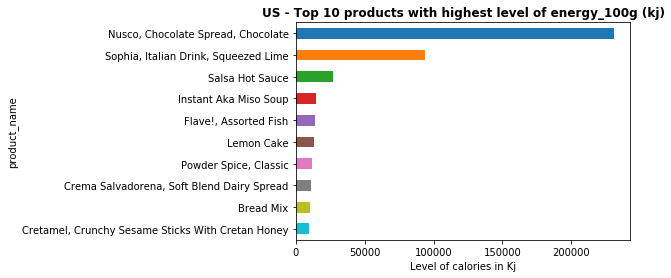

In [36]:
# Plot the Top 10 products for the US
bar_plotUS = v1US.plot.barh()
bar_plotUS.set_title('US - Top 10 products with highest level of energy_100g (kj)', fontweight="bold")
bar_plotUS.set_xlabel('Level of calories in Kj') # x label
bar_plotUS.invert_yaxis() # invert the y axis to get the highest difficulty first

#### Key takeaways
* Most energetic product reported in the US are transformed products with a lot of sugars/fat and/or concentrated products

In [37]:
# Top 10 highest energy products listed in the France only
top10FR=nrj.loc[nrj.new_countries=='France']
top10FR[['product_name','energy_100g','new_countries']].head()

,product_name,energy_100g,new_countries
184,lentilles vertes,NaN,France
185,Root Beer,215.0,France
186,Biscuits sablés fourrage au cacao,NaN,France
190,Thé noir aromatisé violette et fleurs,17.0,France
191,Thé de Noël aromatisé orange-cannelle,NaN,France


In [38]:
# change the index to get the country names
top10FR.set_index('product_name', inplace=True)

In [39]:
# select data for the plot
v1FR=top10FR.sort_values(['energy_100g'], ascending=False)[0:10]['energy_100g']
v1FR

product_name
Grissini a l'huile d'olive                             6276.0
Magret seche tranche                                   6109.0
Crème fouettée mascarpone nature sucré Casa azzurra    6063.0
Bokomo Pronutro Original Wholewheat Honey Melt         5874.0
Tartinanle de la mer                                   5841.0
Sun-up Mango Concentrate Fruit Drink                   5623.0
Sardines aux tomates séchées                           5222.0
Indiana Turkey Jerky                                   4460.0
Saucisson sec pur porc réduit en matières grasses      4422.0
Confiture pastèque citron                              4410.0
Name: energy_100g, dtype: float64

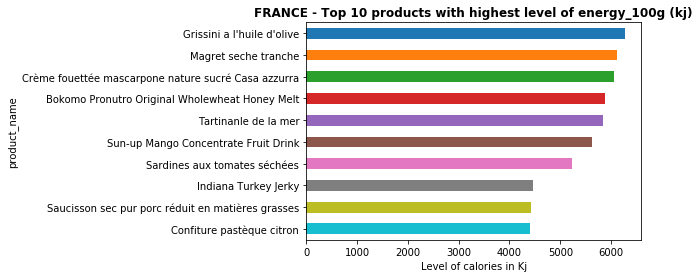

In [40]:
# Plot the Top 10 products for France
bar_plotFR = v1FR.plot.barh()
bar_plotFR.set_title('FRANCE - Top 10 products with highest level of energy_100g (kj)', fontweight="bold")
bar_plotFR.set_xlabel('Level of calories in Kj') # x label
bar_plotFR.invert_yaxis() # invert the y axis to get the highest difficulty first

#### Key takeaways
* The overall level of calories (Kj) for top energetic products reported in France are much lower that the most energetic products in the US
* Top 3 level of calories is driven by fat, proteins and/or sugars

In [41]:
# Top 10 highest energy products listed in the Switzerland only
top10CH=nrj.loc[nrj.new_countries=='Switzerland']
top10CH[['product_name','energy_100g','new_countries']].head()

,product_name,energy_100g,new_countries
7442,Tabasco Pepper Sauce,NaN,Switzerland
20784,Mélange de Fruits Tropicaux,279.0,Switzerland
20876,Pêches Demi-Fruits,281.0,Switzerland
20879,Poires Demi-Fruits : Au Sirop Léger,255.0,Switzerland
21015,Quality Exotics Perles de Melon Au Sirop Léger,257.0,Switzerland


In [42]:
# change the index to get the product names
top10CH.set_index('product_name', inplace=True)

In [43]:
# select data for the plot
v1CH=top10CH.sort_values(['energy_100g'], ascending=False)[0:10]['energy_100g']
v1CH
# not relevant to plot CH data as they have all the same value

product_name
Belfina : Extra Saindoux                                   3700.0
Huile de coco pressée à froid                              3700.0
Beurre À Rôtir                                             3700.0
Lou mas : Huile de tournesol                               3700.0
Saindoux                                                   3700.0
Sais ASTRA COCOS graisse de noix de coco                   3700.0
Sais : Astra 10 : Graisse comestible avec 10% de beurre    3700.0
Die Bratbutter                                             3700.0
Belfina : Balance : Graisse végétale                       3700.0
Graisse végétale                                           3700.0
Name: energy_100g, dtype: float64

#### Key takeaways
* Majority of high level calory for prodducts reported in CH are heavy fat product being part almots of the same category
* Interpretation is very limited in this case

### What are the Top 20 Energy products within the 75% most common energy levels?

In [44]:
# Define the function which will help to identify data with a std deviation >3 (i.e outliers)
# energy_100g
filter0 = np.abs(nrj_clean['energy_100g'] - nrj_clean['energy_100g'].mean()) > (3 * nrj_clean['energy_100g'].std())
filter0.sum() # 98 products

98

In [45]:
# Let's select all the rows now considered as outliers
outliers = nrj_clean.loc[filter0, :]
outliers.shape

(98, 9)

In [46]:
# define a new dataframe without outliers
nrj_new = nrj_clean.drop(outliers.index, axis=0)

In [47]:
nrj_new.describe()

,energy_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,sodium_100g
count,266907.000000,265609.000000,265391.000000,251943.000000,265266.000000,262197.000000
mean,1120.024202,7.100261,31.574284,15.731449,12.708089,0.787702
std,795.728609,8.454994,29.049420,21.042148,17.452302,49.875637
min,0.000000,-800.000000,0.000000,-17.860000,0.000000,0.000000
25%,372.000000,0.680000,5.600000,1.200000,0.000000,0.023622
50%,1092.000000,4.710000,20.000000,5.500000,5.100000,0.227000
75%,1674.000000,10.000000,57.780000,23.440000,20.000000,0.540000
max,3925.000000,305.000000,209.380000,145.000000,100.000000,25320.000000


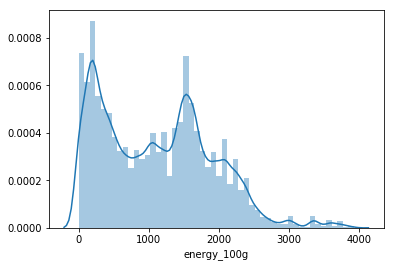

In [48]:
# Let's have a look at the distribution plot of the energy variable
sns.distplot(nrj_new.energy_100g)
plt.rcParams["figure.figsize"]=[20,10]

In [49]:
# change the index to get the product names
nrj_new.set_index('product_name', inplace=True)

In [50]:
# Select energy data with a value < 1674 (75% of all observations)
nrj_new2=nrj_new[nrj_new['energy_100g'] < 1674]

In [51]:
# Top 20 products with a calory level below 1674 Kj
nrj3= nrj_new2.sort_values(['energy_100g'], ascending=False)[0:20]['energy_100g']
nrj3

product_name
10 Pains au Chocolat                       1673.0
Moelleux fourrés fraise                    1673.0
Crème de nougat blanc                      1673.0
Mélange de Biscuits - Recette Japonaise    1673.0
Cheddar au poivre                          1673.0
Moelleux fourré Fraise                     1673.0
Smilly Fourrage à la Fraise                1673.0
Rosette                                    1672.0
Barres riz et blé complet chocolat         1672.0
Flora Original                             1672.0
Flora original                             1672.0
Bonbons tendres aux goûts fruités          1672.0
Ficelles de Pain Recette Sésame pavot      1672.0
Pesto Verde                                1672.0
Schoko 30% weniger Zucker                  1672.0
Multi Frutti                               1672.0
Snack poppé saveur paprika                 1672.0
Madeleines Longues                         1672.0
Délice d'Amandes                           1672.0
Pâté de foie pur porc                

### Key takeaways
* Top 20 products with a calory level (Kj) with the 75% most common energy levels
######  1. Moelleux fourrés fraise
######  2. 10 Pains au Chocolat
######  3. Cheddar au poivre
######  4. Smilly Fourrage à la Fraise   
######  5. Crème de nougat blanc 
######  6. Moelleux fourré Fraise   
######  7. Mélange de Biscuits - Recette Japonaise  
######  8. Bonbons tendres aux goûts fruités   
######  9. Schoko 30% weniger Zucker              
######  10. Flora Original                           
######  11. Ficelles de Pain Recette Sésame pavot   
######  12. Flora original                            
######  13. Barres riz et blé complet chocolat        
######  14. Multi Frutti                              
######  15. Snack poppé saveur paprika                 
######  16. Schoko 30% weniger Zucker                 
######  17. Pâté de foie pur porc                     
######  18. Rosette                                   
######  19. Pesto Verde                               
######  20. Délice d'Amandes

### What is the proportion of products with additives? Is there a pattern between high calory products and number of aditives?

In [52]:
# create a summarized dataframe
add_analysis=df2[['code','product_name','new_countries','energy_100g','additives_n','proteins_100g','carbohydrates_100g','sugars_100g','fat_100g',"sodium_100g"]]
add_analysis.shape # 282,069 products

(282069, 10)

In [53]:
# drop NaN for energy_100g
add_analysis_clean=add_analysis.dropna(subset=['energy_100g'])
add_analysis_clean.isnull().sum()

code                      0
product_name              0
new_countries            51
energy_100g               0
additives_n               0
proteins_100g          1299
carbohydrates_100g     1518
sugars_100g           14982
fat_100g               1644
sodium_100g            4714
dtype: int64

In [54]:
# Select energy data with values > 0
add_analysis_clean=add_analysis_clean[add_analysis_clean['energy_100g'] > 0]

In [55]:
# Percentage of products with additives
a=add_analysis_clean['code'].count()
b=add_analysis_clean[add_analysis_clean['additives_n']>=1].code.count()
b/a*100 # 61.98% of product listed in the cleaned database include additives

61.98206375435412

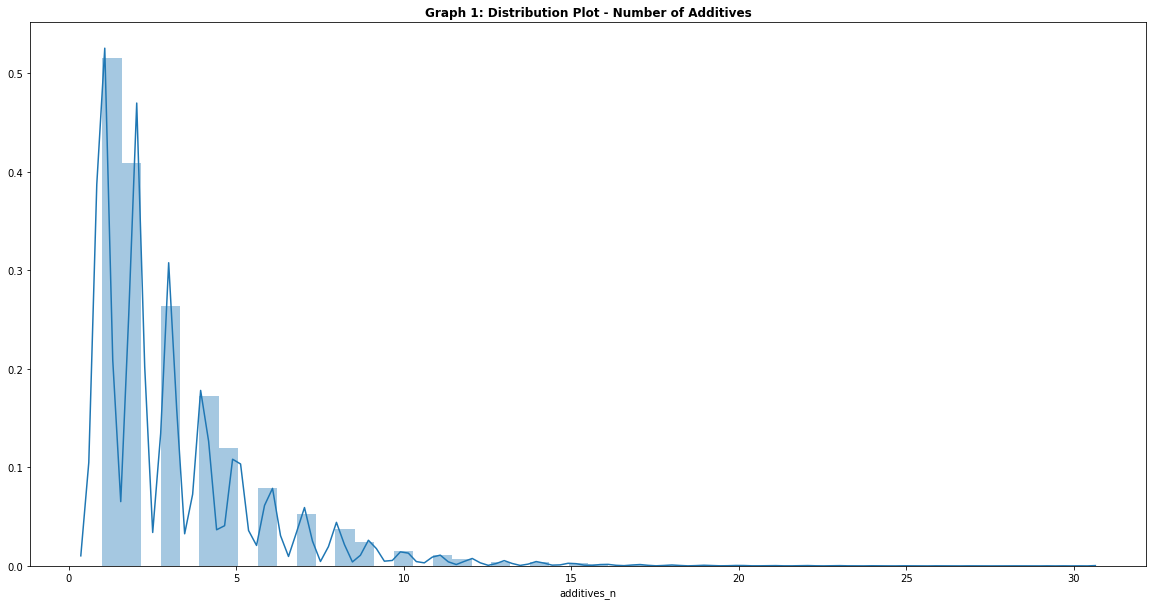

In [56]:
# Let's have a look at the distribution plot of the nb of additives
dist=add_analysis_clean[add_analysis_clean['additives_n']>=1]
sns.distplot(dist.additives_n)
plt.title('Graph 1: Distribution Plot - Number of Additives', fontweight="bold")
plt.rcParams["figure.figsize"]=[20,10]
# large majority of number of additives per product is <5

In [57]:
add_analysis_clean['energy_100g'].shape

(257802,)

In [58]:
add_analysis_clean['additives_n'].shape

(257802,)

C:\Users\fbaff\Anaconda3\envs\dl-workshop\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


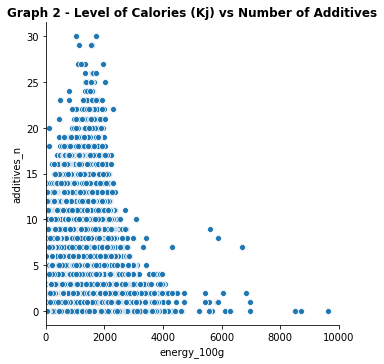

In [59]:
# Plot level of energy and number of additives (exploratory for energy values <10,000 Kj)
sns.pairplot(add_analysis_clean,  x_vars = ['energy_100g'], y_vars=['additives_n'], size = 5)
plt.title('Graph 2 - Level of Calories (Kj) vs Number of Additives',fontweight="bold")
plt.xlim([0, 10000])
plt.rcParams["figure.figsize"]=[20,10]
plt.show()

### Key takeways
* A large majority of number of additives per product is <5 (Graph 1) 
* Most of the products which have a calory level < 4000 Kj would have at least one additive (Graph 2)
* It appears that there is not necessarily a correlation between the number of additives and a high level of calories or eventually the number of additives may have an impact of a low level of calories (to be further explored in the last part of the project); Graph 2

### What are the products with the most balanced levels of core nutrients? What is their level of calory? What is their breakdown of core nutrients?

#### Preliminary remarks: What is a balanced level of nutrients?
* According to common practice, the levell of carbohydrates should be ranged between 45% and 65% of total calories 
(https://www.livescience.com/51976-carbohydrates.html)
* Additionally, WHO recommendations for adult are: less than 10% of free sugars and less than 30% of fat   
(http://www.who.int/en/news-room/fact-sheets/detail/healthy-diet)
* Even if those % are generally appplied to an average daily regime, we will try to identify products in the factfood database which would match these criteria

In [60]:
# Let's create a new dataframe food3 based on the dataframe from the previous question
food3 =add_analysis_clean
food3.shape # 257,802 products

(257802, 10)

In [61]:
# Create columns to compute the % of proteins, carbohydrates, fat for each given products and other calculus for visualization
food3['carbohydrates_perc']=(food3['carbohydrates_100g']/food3['energy_100g'])*100
food3['fat_perc']=(food3['fat_100g']/food3['energy_100g'])*100
food3['sugars_perc']=(food3['sugars_100g']/food3['energy_100g'])*100
food3['core_nutrients_perc']=food3['sugars_perc']+food3['carbohydrates_perc']+food3['fat_perc']
food3['Others_perc']=100-food3['core_nutrients_perc'] # variable useful for stacked bar chart
food3['Total_perc']=food3['core_nutrients_perc']+food3['Others_perc']
food3

,code,product_name,new_countries,energy_100g,additives_n,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,sodium_100g,carbohydrates_perc,fat_perc,sugars_perc,core_nutrients_perc,Others_perc,Total_perc
1,0000000004530,Banana Chips Sweetened (Whole),United States,2243.0,0.0,3.570,64.29,14.29,28.57,0.000000,2.866251,1.273741,0.637093,4.777084,95.222916,100.0
2,0000000004559,Peanuts,United States,1941.0,0.0,17.860,60.71,17.86,17.86,0.250000,3.127769,0.920144,0.920144,4.968058,95.031942,100.0
3,0000000016087,Organic Salted Nut Mix,United States,2540.0,0.0,17.860,17.86,3.57,57.14,0.482000,0.703150,2.249606,0.140551,3.093307,96.906693,100.0
4,0000000016094,Organic Polenta,United States,1552.0,0.0,8.570,77.14,NaN,1.43,NaN,4.970361,0.092139,NaN,NaN,NaN,NaN
5,0000000016100,Breadshop Honey Gone Nuts Granola,United States,1933.0,0.0,13.460,63.46,11.54,18.27,NaN,3.282980,0.945163,0.596999,4.825142,95.174858,100.0
6,0000000016117,Organic Long Grain White Rice,United States,1490.0,0.0,8.890,80.00,NaN,NaN,NaN,5.369128,NaN,NaN,NaN,NaN,NaN
7,0000000016124,Organic Muesli,United States,1833.0,1.0,14.060,57.81,15.62,18.75,0.055000,3.153846,1.022913,0.852155,5.028914,94.971086,100.0
8,0000000016193,Organic Dark Chocolate Minis,United States,2406.0,0.0,5.000,55.00,42.50,37.50,NaN,2.285952,1.558603,1.766417,5.610973,94.389027,100.0
9,0000000016513,Organic Sunflower Oil,United States,3586.0,0.0,NaN,NaN,NaN,100.00,NaN,NaN,2.788622,NaN,NaN,NaN,NaN
10,0000000016612,Organic Adzuki Beans,United States,1393.0,0.0,22.920,62.50,NaN,1.04,NaN,4.486719,0.074659,NaN,NaN,NaN,NaN


In [62]:
# there are some inconsistencies and/or mistakes in the way figures are reported. As a consequence, we will consider products
# with a Total_% of 100% and less for this specific question
food4=food3[food3['core_nutrients_perc'] <= 100]
food4.shape # 245,052 products

(245052, 16)

In [63]:
# Let's define the selection rules as: Carbohydrates (45% to 65%) and Fat (20%-35%) and Protein (10%-35%)
target=food4[(food4['carbohydrates_perc'] >= 45) & (food4['carbohydrates_perc'] <= 65) & (food4['sugars_perc'] <=10) & (food4['fat_perc'] <=30)]
target.shape # 29 products are matching these criteria

(29, 16)

In [64]:
# change the index to get the product names
target.set_index('product_name', inplace=True)

In [65]:
# select data for the plot (ranking based on the level of energy)
targ1=target.sort_values(['energy_100g'], ascending=False)
targ1.head(10)

,code,new_countries,energy_100g,additives_n,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,sodium_100g,carbohydrates_perc,fat_perc,sugars_perc,core_nutrients_perc,Others_perc,Total_perc
product_name,,,,,,,,,,,,,,,
Stevia,3250392282509,France,209.0,2.0,0.50,98.00,0.50,0.50,0.003937,46.889952,0.239234,0.239234,47.368421,52.631579,100.0
Farine bio de millet,3380380054921,France,155.2,0.0,8.40,74.30,0.60,3.50,0.003937,47.873711,2.255155,0.386598,50.515464,49.484536,100.0
Butter & Herb Mashed Potatoes,0041220824274,United States,155.0,11.0,7.41,74.07,3.70,3.70,1.630000,47.787097,2.387097,2.387097,52.561290,47.438710,100.0
le pennette rigate N87,8001200037225,Switzerland,152.0,0.0,13.00,72.00,2.50,1.50,0.003937,47.368421,0.986842,1.644737,50.000000,50.000000,100.0
"Enriched Macaroni Product, Fettuccine",0026800006394,United States,151.0,2.0,12.50,75.00,1.79,1.79,0.000000,49.668874,1.185430,1.185430,52.039735,47.960265,100.0
Premium Jasmine Rice,0949221212192,United States,142.0,0.0,6.50,79.00,1.00,1.00,1.000000,55.633803,0.704225,0.704225,57.042254,42.957746,100.0
Organic Sprouted Whole Wheat Flour,0675625104633,United States,138.0,0.0,13.33,66.67,0.00,3.33,0.000000,48.311594,2.413043,0.000000,50.724638,49.275362,100.0
Thé glacé earl grey,3256225741274,France,92.0,2.0,0.50,53.00,5.10,0.50,0.019685,57.608696,0.543478,5.543478,63.695652,36.304348,100.0
Barbãr au Miel,5411676100812,"Belgique,France,Allemagne,Hongrie,Switzerland",84.0,0.0,0.00,40.00,2.00,0.00,0.000000,47.619048,0.000000,2.380952,50.000000,50.000000,100.0


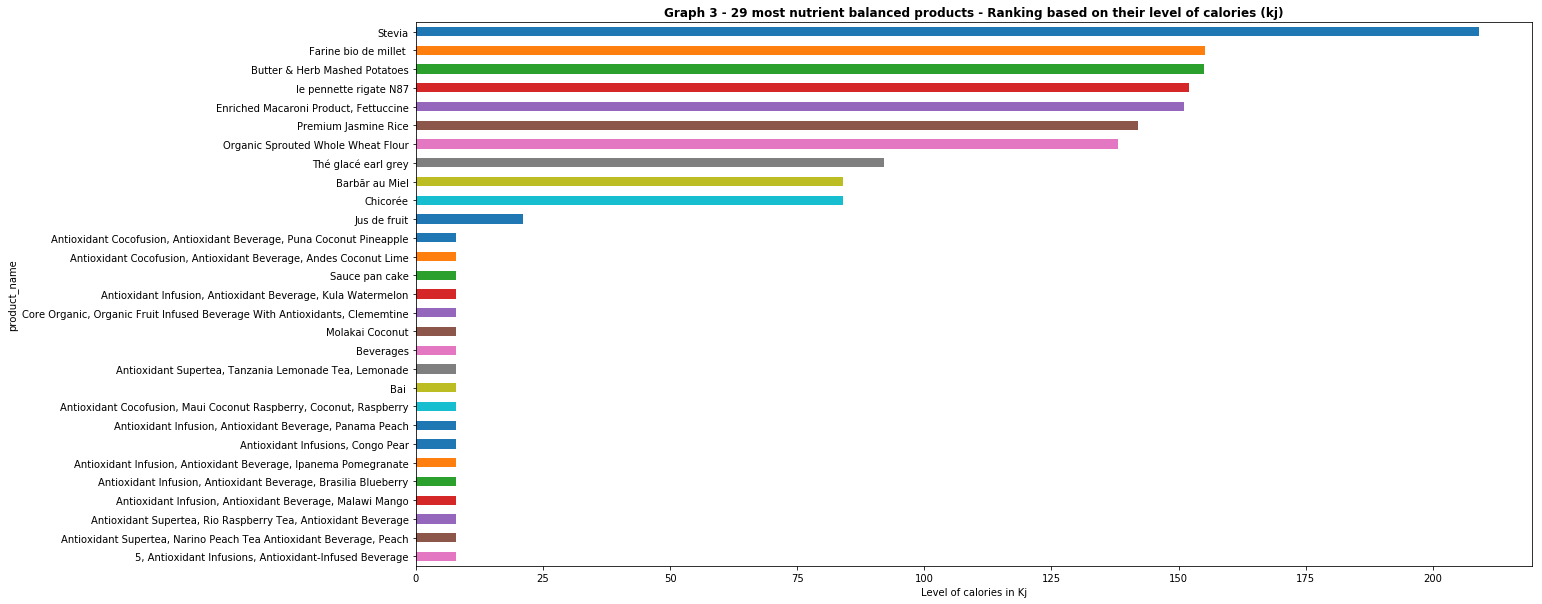

In [66]:
# Plot 29 products matching balance nutrients criteria (ranking based on their level of calories)
bar_plot1 = targ1['energy_100g'].plot.barh()
bar_plot1.set_title('Graph 3 - 29 most nutrient balanced products - Ranking based on their level of calories (kj)',fontweight="bold")
bar_plot1.set_xlabel('Level of calories in Kj') # x label
plt.rcParams["figure.figsize"]=[30,10]
bar_plot1.invert_yaxis() # invert the y axis to get the highest difficulty first
plt.show()

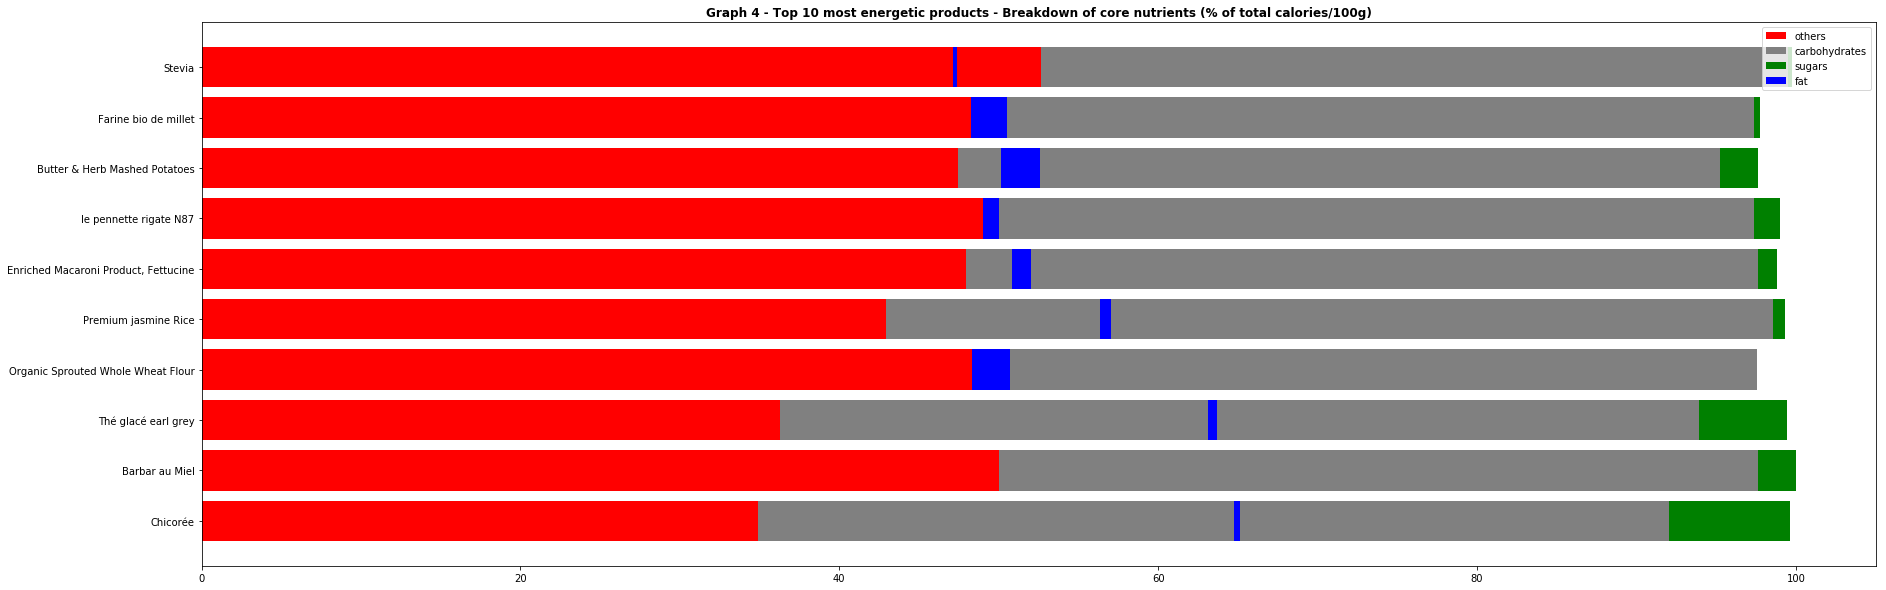

In [67]:
# data
others = targ1[0:10]['Others_perc']
carbohydrates = targ1[0:10]['carbohydrates_perc']
sugars = targ1[0:10]['sugars_perc']
fat = targ1[0:10]['fat_perc']
y=np.arange(len(others))

# plot
plt.barh(y, others,color='red')
plt.barh(y,carbohydrates,color='gray', left=others)
plt.barh(y,sugars, color='green',left=list(map(lambda g, y: g+y, others,carbohydrates)))
plt.barh(y,fat, color='blue',left=list(map(lambda g, y: g+y, carbohydrates,sugars)))

# labels
y_labels=['Stevia','Farine bio de millet','Butter & Herb Mashed Potatoes','le pennette rigate N87','Enriched Macaroni Product, Fettucine','Premium jasmine Rice','Organic Sprouted Whole Wheat Flour','Thé glacé earl grey','Barbar au Miel','Chicorée']
plt.yticks(y, y_labels)

# legend
plt.legend(['others','carbohydrates', 'sugars','fat'], loc='upper right')

# set the title
plt.title('Graph 4 - Top 10 most energetic products - Breakdown of core nutrients (% of total calories/100g)', fontweight="bold")

# invert y axis
plt.gca().invert_yaxis() # invert the y axis to get the highest difficulty first
plt.rcParams["figure.figsize"]=[20,10]
plt.show()

### Key takeways
* There are 29 products in the foodfact database matching balanced nutrition criteria (Graph 3). Their energy level is below 200Kj per 100g
* Most of them could be grouped in 3 categories (Graph 3): Natural product (e.g. Stevia), limited transformed products (flour, rice, pasta) or antioxidant beverages
* If we focus on the Top 10 in terms of claories (among those 29 products), most of them are made of a majority of carbohydrates, a minority of fat and sugars, the difference coming from other constituents (Graph 4)

## C. Text Data

In [68]:
# Let's have a look at "ingredients_lits" and transform data as strings
df2['ingredients_text'].astype(str)

1         Bananas, vegetable oil (coconut oil, corn oil ...
2         Peanuts, wheat flour, sugar, rice flour, tapio...
3         Organic hazelnuts, organic cashews, organic wa...
4                                           Organic polenta
5         Rolled oats, grape concentrate, expeller press...
6                             Organic long grain white rice
7         Org oats, org hemp granola (org oats, evaporat...
8         Organic chocolate liquor, organic raw cane sug...
9         Organic expeller pressed, refined high oleic s...
10                                     Organic adzuki beans
11               Organic refined durum semolina wheat flour
12        Roasted peanuts (peanuts, peanut or canola oil...
13                                Organic golden flax seeds
14        Organic dry roasted pumpkin seeds, tamari (soy...
15        Organic rolled oats, honey, raisins, almonds, ...
16                                   Organic raw hazelnuts.
17        Organic bananas, organic cocon

In [69]:
# define a dataframe to perform manipulation
new_ingredients = df2["ingredients_text"]

In [70]:
# define a function to remove all unwanted elements; i.e text between brackets and then replacing the "space" with a ", "
def transform(s):
    s=s.str.replace(r'\(.*?\)', '') # text between brackets
    s=s.str.replace('  ',', ') # 2 spaces replaced by a ", "
    s=s.str.replace('\d*','') # replace '*' by a space
    s=s.str.replace('%','')# replace % by a space
    s=s.str.replace('*','') # replace * by a space
    s=s.str.replace(' -',',')
    s=s.str.replace('.','')
    s=s.str.replace(' and',',')
    return s

In [71]:
# apply the cleaning "transform" function to new_ingredients data
new_ingredients=transform(new_ingredients)
new_ingredients.head()

1    Bananas, vegetable oil, sugar, natural banana ...
2    Peanuts, wheat flour, sugar, rice flour, tapio...
3    Organic hazelnuts, organic cashews, organic wa...
4                                      Organic polenta
5    Rolled oats, grape concentrate, expeller press...
Name: ingredients_text, dtype: object

In [72]:
# create a new column "new_ingredients"
df2['new_ingredients']=new_ingredients

C:\Users\fbaff\Anaconda3\envs\dl-workshop\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
# drop the former column "ingredients_text"
df2.drop(['ingredients_text'], axis=1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,new_countries,new_ingredients
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09 14:32:37,1489069957,2017-03-09 14:32:37,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,United States,"Bananas, vegetable oil, sugar, natural banana ..."
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09 14:32:37,1489069957,2017-03-09 14:32:37,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,United States,"Peanuts, wheat flour, sugar, rice flour, tapio..."
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09 10:35:31,1489055731,2017-03-09 10:35:31,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,United States,"Organic hazelnuts, organic cashews, organic wa..."
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09 10:34:13,1489055653,2017-03-09 10:34:13,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,Organic polenta
5,0000000016100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09 10:34:11,1489055651,2017-03-09 10:34:11,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,"Rolled oats, grape concentrate, expeller press..."
6,0000000016117,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055730,2017-03-09 10:35:30,1489055730,2017-03-09 10:35:30,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,Organic long grain white rice
7,0000000016124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09 10:35:11,1489055712,2017-03-09 10:35:12,Organic Muesli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,United States,"Org oats, org hemp granola , org raisins, org ..."
8,0000000016193,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09 10:34:11,1489055651,2017-03-09 10:34:11,Organic Dark Chocolate Minis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,"Organic chocolate liquor, organic raw cane sug..."
9,0000000016513,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09 10:34:14,1489055654,2017-03-09 10:34:14,Organic Sunflower Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,"Organic expeller pressed, refined high oleic s..."
10,0000000016612,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09 10:35:31,1489055731,2017-03-09 10:35:31,Organic Adzuki Beans,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,Organic adzuki beans


In [74]:
# split the list of ingredients into individual columns (+ make sure we have strings)
df3=(df2['new_ingredients'].str.split(',', expand=True).rename(columns=lambda x: f"ingredients_{x+1}"))
df3.astype(str)

,ingredients_1,ingredients_2,ingredients_3,ingredients_4,ingredients_5,ingredients_6,ingredients_7,ingredients_8,ingredients_9,ingredients_10,...,ingredients_128,ingredients_129,ingredients_130,ingredients_131,ingredients_132,ingredients_133,ingredients_134,ingredients_135,ingredients_136,ingredients_137
1,Bananas,vegetable oil,sugar,natural banana flavor,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Peanuts,wheat flour,sugar,rice flour,tapioca starch,salt,leavening,soy sauce,potato starch,None,...,None,None,None,None,None,None,None,None,None,None
3,Organic hazelnuts,organic cashews,organic walnuts almonds,organic sunflower oil,sea salt,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Organic polenta,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,Rolled oats,grape concentrate,expeller pressed canola oil,sunflower seeds,almonds,walnuts oat bran,sesame seeds,cashews,natural vitamin e,None,...,None,None,None,None,None,None,None,None,None,None
6,Organic long grain white rice,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Org oats,org hemp granola,org raisins,org dates,org almonds,org hazelnuts,org coconut,org sunflower seeds,org pumpkin seeds,org flax seeds,...,None,None,None,None,None,None,None,None,None,None
8,Organic chocolate liquor,organic raw cane sugar,organic cocoa butter,organic unrefined whole cane sugar,organic ground vanilla beans,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Organic expeller pressed,refined high oleic sunflower oil,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10,Organic adzuki beans,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [75]:
# select most common group of igredients; i.e column 1 to 10
df3a=df3[["ingredients_1", "ingredients_2", "ingredients_3", "ingredients_4", "ingredients_5", "ingredients_6", "ingredients_7", "ingredients_8", "ingredients_9", "ingredients_10"]]
df3a

,ingredients_1,ingredients_2,ingredients_3,ingredients_4,ingredients_5,ingredients_6,ingredients_7,ingredients_8,ingredients_9,ingredients_10
1,Bananas,vegetable oil,sugar,natural banana flavor,None,None,None,None,None,None
2,Peanuts,wheat flour,sugar,rice flour,tapioca starch,salt,leavening,soy sauce,potato starch,None
3,Organic hazelnuts,organic cashews,organic walnuts almonds,organic sunflower oil,sea salt,None,None,None,None,None
4,Organic polenta,None,None,None,None,None,None,None,None,None
5,Rolled oats,grape concentrate,expeller pressed canola oil,sunflower seeds,almonds,walnuts oat bran,sesame seeds,cashews,natural vitamin e,None
6,Organic long grain white rice,None,None,None,None,None,None,None,None,None
7,Org oats,org hemp granola,org raisins,org dates,org almonds,org hazelnuts,org coconut,org sunflower seeds,org pumpkin seeds,org flax seeds
8,Organic chocolate liquor,organic raw cane sugar,organic cocoa butter,organic unrefined whole cane sugar,organic ground vanilla beans,None,None,None,None,None
9,Organic expeller pressed,refined high oleic sunflower oil,None,None,None,None,None,None,None,None
10,Organic adzuki beans,None,None,None,None,None,None,None,None,None


In [76]:
df4=df3a.stack().reset_index(drop=True)
df5=df4.str.lower()

In [77]:
df5.value_counts()
# we will group together English and French words

 salt                                                                                                                            57034
 sugar                                                                                                                           42087
 water                                                                                                                           40548
 sel                                                                                                                             25583
                                                                                                                                 24961
 citric acid                                                                                                                     20529
                                                                                                                                 20162
 sucre                                                 

### Key takeaway (Question C)
* 5 most common ingredients are: sugar, water, citric acid & corn syrup

### D. Time Series
* Analyze the mean time difference between these two values
* Analyze the mean number of created items per month over the timeline of the data

In [78]:
# Define a dataframe with key variables for this exercise: code, created_date, last_modified_date
tsdf= df2[['code','created_datetime','last_modified_datetime']]
tsdf.head()

,code,created_datetime,last_modified_datetime
1,0000000004530,2017-03-09 14:32:37,2017-03-09 14:32:37
2,0000000004559,2017-03-09 14:32:37,2017-03-09 14:32:37
3,0000000016087,2017-03-09 10:35:31,2017-03-09 10:35:31
4,0000000016094,2017-03-09 10:34:13,2017-03-09 10:34:13
5,0000000016100,2017-03-09 10:34:11,2017-03-09 10:34:11


In [79]:
# create a new column to compute the time difference
tsdf['time_diff']=(tsdf['last_modified_datetime'] - tsdf['created_datetime'])

C:\Users\fbaff\Anaconda3\envs\dl-workshop\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
tsdf.head()

,code,created_datetime,last_modified_datetime,time_diff
1,0000000004530,2017-03-09 14:32:37,2017-03-09 14:32:37,0 days
2,0000000004559,2017-03-09 14:32:37,2017-03-09 14:32:37,0 days
3,0000000016087,2017-03-09 10:35:31,2017-03-09 10:35:31,0 days
4,0000000016094,2017-03-09 10:34:13,2017-03-09 10:34:13,0 days
5,0000000016100,2017-03-09 10:34:11,2017-03-09 10:34:11,0 days


In [81]:
# check data types
tsdf.dtypes

code                               object
created_datetime           datetime64[ns]
last_modified_datetime     datetime64[ns]
time_diff                 timedelta64[ns]
dtype: object

In [82]:
# Let's check the highest values
tsdf.sort_values('time_diff',ascending=False).head()

,code,created_datetime,last_modified_datetime,time_diff
217678,3254550030230,2012-02-15 21:32:35,2017-09-10 11:13:34,2033 days 13:40:59
333186,8002270014901,2012-02-11 20:46:21,2017-08-25 07:10:45,2021 days 10:24:24
196094,3045140118502,2012-02-12 08:32:47,2017-08-19 14:18:24,2015 days 05:45:37
228732,3265474000018,2012-03-19 14:34:36,2017-09-10 11:06:59,2000 days 20:32:23
194506,3033710003457,2012-03-26 12:14:19,2017-09-16 18:09:22,2000 days 05:55:03


In [83]:
tsdf['time_diff'].mean()
# the mean of the time difference is: 110 days 15:18:52.405461
# it idincates that there are probably some products which are up-dated on a regular basis since the beginning of the database

Timedelta('110 days 15:18:52.405461')

### Key takeaway
* Mean of the time difference is: 110 days 15:18:52

In [84]:
# set the datetime as index to compute the mean of items created by time period
new=tsdf.set_index('created_datetime')
new.head()

,code,last_modified_datetime,time_diff
created_datetime,,,
2017-03-09 14:32:37,0000000004530,2017-03-09 14:32:37,0 days
2017-03-09 14:32:37,0000000004559,2017-03-09 14:32:37,0 days
2017-03-09 10:35:31,0000000016087,2017-03-09 10:35:31,0 days
2017-03-09 10:34:13,0000000016094,2017-03-09 10:34:13,0 days
2017-03-09 10:34:11,0000000016100,2017-03-09 10:34:11,0 days


In [85]:
# define a fixed interval per month
by_month =new.groupby(new.index.month).count()
by_month

,code,last_modified_datetime,time_diff
created_datetime,,,
1,6296,6296,6296
2,12657,12657,12657
3,177617,177617,177617
4,12072,12072,12072
5,11949,11949,11949
6,10920,10920,10920
7,9918,9918,9918
8,11887,11887,11887
9,10316,10316,10316


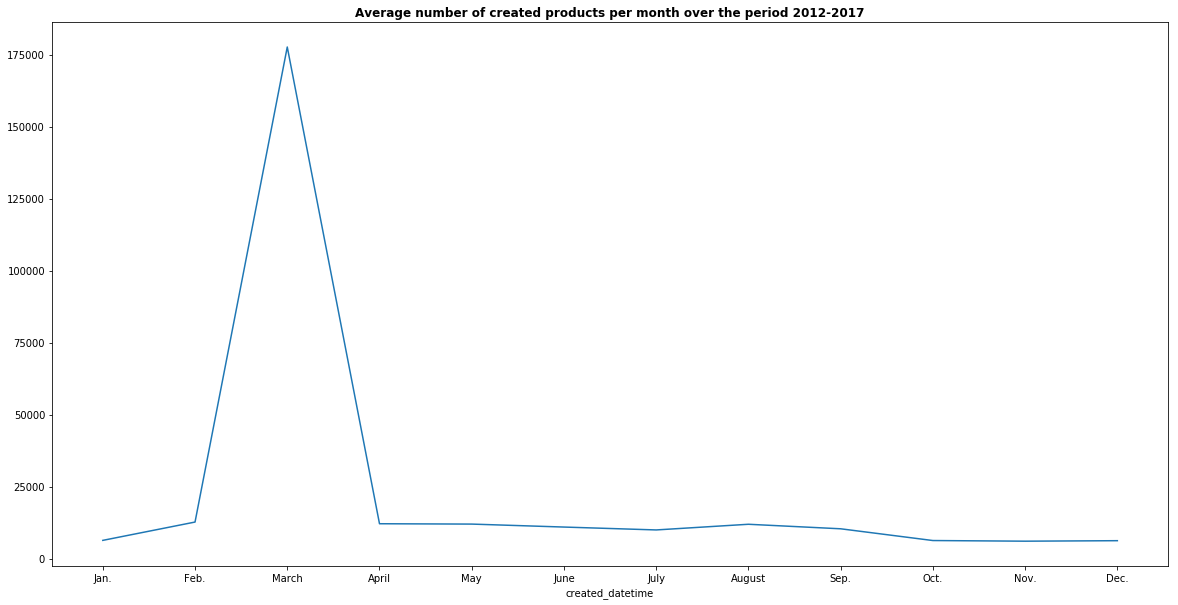

In [86]:
# plot the data per month
by_month['code'].plot()

# labels
x=np.arange(12)+1
x_labels=['Jan.','Feb.','March','April','May','June','July','August','Sep.','Oct.','Nov.','Dec.']
plt.xticks(x, x_labels)

# set the title
plt.title('Average number of created products per month over the period 2012-2017', fontweight="bold")
plt.show()

### E. Build a database
* restrict your data to 1000 entries and 5 columns of your choice
* create a connection to a sqlite3 database
* create one or multiple tables, at least one of the tables should have a PRIMARY KEY
* fill the database with your data
* run at least one query to demonstrate that it works correctly


In [87]:
# define a dataframe which will be used for filling the database
dbase=add_analysis_clean[['product_name', 'energy_100g','additives_n','proteins_100g','new_countries']][0:1000]
dbase.shape

(1000, 5)

In [88]:
# create a database
db = sqlite3.connect('dbsubmission2.db')

# defining our helper function for running queries
def run_query(query):
    return pd.read_sql_query(query,db)

NameError: name 'sqlite3' is not defined

In [ ]:
# loading the data into the database
dbase.to_sql(name='dbsubmission2', con=db, if_exists='append', index=False)

In [ ]:
# checking that all data have been loaded
#checking that all the data was loaded
run_query("SELECT COUNT(*) FROM dbsubmission2")

In [ ]:
# check the first 5 rows of the table "dbsubmission2"
run_query("SELECT * FROM dbsubmission2 LIMIT 5;")

In [ ]:
# query: How many products with an energy level between 1200 and 2000?
query='''
SELECT energy_100g, COUNT(*) AS "Count" FROM dbsubmission2 
WHERE (energy_100g BETWEEN 1200 AND 2000)
limit 10;
'''
run_query(query) #314 products

In [ ]:
# What are the top 10 products with the highest level of energy and from which countries?
query='''
SELECT product_name, energy_100g, new_countries FROM dbsubmission2 
ORDER BY energy_100g DESC 
LIMIT 10;
'''
run_query(query)

### F. Finding correlations
* Identify the variables which most affect the nutritional score and provide some insight into which factors cause both a low or a high nutritional score

    #### Preliminary remarks
    * Nutrition score definition is available at: https://www.ndph.ox.ac.uk/cpnp/files/about/uk-ofcom-nutrient-profile-model.pdf
    * Points for foods and drinks fall on a scale from 1 to 100 where 1 is the least healthy and 100 is the most healthy


In [ ]:
# https://www.ndph.ox.ac.uk/cpnp/files/about/uk-ofcom-nutrient-profile-model.pdf

In [ ]:
# We take the datframe cleaned at the question A as a starting point
df2.head()

In [ ]:
# check number of products having a nutrition score 
df2['nutrition-score-uk_100g'].isnull().sum() # 53,199

In [ ]:
# drop NaN for nutrition-score-uk-100g
df2ns=df2.dropna(subset=['nutrition-score-uk_100g'])
df2ns.isnull().sum()

In [ ]:
df2ns

In [ ]:
df2ns.describe()
# Globally Mean and Standard deviation vary a lot from one variable to the other
# We would need to normalize data before performing the correlatin analysis

In [ ]:
# Let's have a look at the distribution plot
sns.distplot(df2ns['nutrition-score-uk_100g'])
plt.title('Displot nutrition score', fontweight="bold")
plt.rcParams["figure.figsize"]=[20,10]
# In order to focus the interpretation, we would consider 2 groups of products the "less healthy" having a NS from -10 to 10
# and " more healthy" products with a nutrition score from 10 to 30
# we may decide to discretize the NS if the normalization will not provide conclusive highlights

#### For the correlation matrix analysis we will consider the following criteria:
* A correlation matrix analysis performed on all numeric variables did not provide relevant results. We will adopt a more targeted approach based on the following principles:
    * Variables included in the calculation of the nutrition score (for which we have data): Energy, Saturated Fat, Total Sugar, Sodium, Fruit, Veg & Nuts (%), Fibre (g)
    * Other variables which we would assume being potentially relevant based on nutrition reports: number of additives...

#### Analysis of the overall nutrition score

In [ ]:
# select variables to perform the targeted correlation analysis
targ_corr=df2ns[['product_name',           
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
'fiber_100g',
 'starch_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'calcium_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'collagen-meat-protein-ratio_100g',
 'nutrition-score-uk_100g']]

In [ ]:
# change the index to get the product names
targ_corr.set_index('product_name', inplace=True)

In [ ]:
# replace NaN values by 0
targ_corr.fillna(0, inplace=True)

In [ ]:
# Compute the correlation matrix
corr = targ_corr.corr()
# source:https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# define the style
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '200px', 'font-size': '10pt'})\
    .set_precision(2)\

### Key takeways (overall nutrition score)
* Overall nutrition score is positively correlated to energy_100g (0.56), fat_100g (0.59), saturated fate (0.64) and sugars_100g to a certain extent (0.42)

#### Analysis of the low nutrition score (from -10 to +10)

In [ ]:
# We will analyse correlation matrix for low nutrition score; between -10 and +10
targ_corr_low= targ_corr[(targ_corr['nutrition-score-uk_100g']  >= 0) & (targ_corr['nutrition-score-uk_100g'] <= 10)]

In [ ]:
# replace NaN values by 0
targ_corr_low.fillna(0, inplace=True)

In [ ]:
# Compute the correlation matrix
corr = targ_corr_low.corr()
# source:https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# define the style
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\

### Key takeways (low nutrition score)
* From -10 to 10: correlation score are: energy 0.3, fat 0.37, sugar 0.36 - There are not very strong variables correlated to nutrition score
* From 0 to 10: energy 0.54, fat 0.36, carbohydrates 0.45, sugars 0.34 - Energy and carbohydrates present the highest correlation indicator. However, not very conclusive

#### Analysis of the high nutrition score (from 10 to 30)

In [ ]:
# We will analyse correlation matrix for low nutrition score; between -10 and +10
targ_corr_high= targ_corr[(targ_corr['nutrition-score-uk_100g']  > 10) & (targ_corr['nutrition-score-uk_100g'] <= 30)]

In [ ]:
# replace NaN values by 0
targ_corr_high.fillna(0, inplace=True)

In [ ]:
# Compute the correlation matrix
corr = targ_corr_high.corr()
# source:https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# define the style
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\

### Key takeways (high nutrition score)
* From >10 to 30: correlation score are: energy 0.27, fat 0.36, saturated fat 0.53 - saturated fat seems to present some correlation to nutrition score
* From 20 to 30: carbohydrates 0.24, sugars 0.24 - There are not very strong variables correlated to nutrition score

### End of the Project

### Back-up analysis

#### Correlation analysis with groups of food is not conclusive

In [ ]:
cat_corr=df2ns[['product_name','nutrition-score-uk_100g','pnns_groups_1','pnns_groups_2']]
cat_corr.head()

In [ ]:
# change the index to get the product names
cat_corr.set_index('product_name', inplace=True)

In [ ]:
# replace NaN values by 0
cat_corr.fillna(0, inplace=True)

In [ ]:
# create a dataframe (dummy) including dummy variable from the original "Region" variable
dummy1=pd.get_dummies(cat_corr['pnns_groups_1'])
dummy2=pd.get_dummies(cat_corr['pnns_groups_2'])

In [ ]:
# Concatanate cat_corr and dummy dataframes
cat_corrA=pd.concat([cat_corr, dummy1, dummy2], axis=1)
cat_corrA

In [ ]:
# drop pnns_groups_ 1 variable
cat_corr1=cat_corrA.drop('pnns_groups_1', axis=1)

In [ ]:
# drop pnns_groups_ 2 variable
cat_corr2=cat_corr1.drop('pnns_groups_2', axis=1)
cat_corr2

In [ ]:
cat_corr2.corr()

### Brute force correlation exercise

In [ ]:
# select variables to perform the correlation analysis
df2ns_corr=df2ns[['product_name',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 '-caprylic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-montanic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 '-alpha-linolenic-acid_100g',
 '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 '-linoleic-acid_100g',
 '-arachidonic-acid_100g',
 '-gamma-linolenic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 '-oleic-acid_100g',
 '-gondoic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 '-sucrose_100g',
 '-glucose_100g',
 '-fructose_100g',
 '-lactose_100g',
 '-maltose_100g',
 '-maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 'fiber_100g',
 'proteins_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin-a_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'folates_100g',
 'vitamin-b12_100g',
 'biotin_100g',
 'pantothenic-acid_100g',
 'silica_100g',
 'bicarbonate_100g',
 'potassium_100g',
 'chloride_100g',
 'calcium_100g',
 'phosphorus_100g',
 'iron_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g',
 'fluoride_100g',
 'selenium_100g',
 'chromium_100g',
 'molybdenum_100g',
 'iodine_100g',
 'caffeine_100g',
 'taurine_100g',
 'ph_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'collagen-meat-protein-ratio_100g',
 'cocoa_100g',
 'carbon-footprint_100g',
 'nutrition-score-uk_100g']]

In [ ]:
# change the index to get the product names
df2ns_corr.set_index('product_name', inplace=True)

In [ ]:
# replace NaN values by 0
df2ns_corr.fillna(0, inplace=True)

In [ ]:
# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
normalizer.transform(df2ns_corr)

In [ ]:
# Compute the correlation matrix
corr = df2ns_corr.corr()
# source:https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# define the style
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '200px', 'font-size': '10pt'})\
    .set_precision(2)\

In [ ]:
# energy 0.54, fat 0.59, saturated fat 0.64